# Background Information

There are several simple extensions of linear models:
 * **Polynomial regression** extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. 
 * **Step functions** cut the range of a variable into K distinct regions in order to produce a qualitative variable. 
 * **Regression splines** are more flexible than polynomials and step functions. They involve dividing the range of X into K distinct regions. Within each region, a polynomial function is fit to the data. These polynomials are constrained so that they join smoothly at the region boundaries, or *knots*. Provided K is large enough, this can produce an extremely flexible fit
 * **Smoothing splines** are similar to regression splines but result from minimizing a residual sum of squares criterion subject to a smoothness penalty
 * **Local regression** is similar to splines, but the regions are allowed to overlap, and do so in a smooth way
 * **Generalized additive models** allow us to extend the models above to deal with multiple predictors
 
## Polynomial Regression

$$ y_i = \beta_0 + \beta_1x_i + \beta_2x_i^2 + \beta_3x_i^3 + ... + \beta_dx_i^d + \epsilon_i $$

Generally speaking, it is unusualy for d to be greater than 3 or 4.

## Step Functions

We can use step functions in order to avoid imposing a global structure. We break the range of X into bins and fit a different constant in each bin. 

We create cutpoints, $c_1, c_2, ..., c_K$ in the range of X and then construct $K+1$ new variables

$$ C_0(X) = I(X<c_1), $$
$$ C_1(X) = I(c_1 \le X < c_2), $$ 
$$ C_2(X) = I(c_2 \le X < c_3), $$ 
$$ \vdots $$ 
$$ C_K(X) = I(c_K \le X) $$

$$ y_i = \beta_0 + \beta_1C_1(x_i) + \beta_2C_2(x_i) + ... + \beta_KC_K(x_i) + \epsilon_i $$

For a given X, at most one $C_1, ... C_K$ can be non-zero. 

## Basis Functions

Pollynomial and step function models are special cases of a basis function approach. The idea is to have a family of functions or transformations that can be applied to a variable X: $b_1(X), b_2(X), ..., b_K(X)$. Thus we fit the model: 
$$ y_i = \beta_0 + \beta_1b_1(x_i) + \beta_2b_2(x_i) + ... + \beta_Kb_K(x_i) + \epsilon_i $$

For polynomial regression, $b_j(x_i) = x_i^j$, and for step functions $b_j(x_i) = I(c_j \le x_i < c_{j+1})$. Importantly, this means that all of the inference tools we used for linear regression are still available with these models. 

## Regression Splines
### Piecewise Polynomials
Piecewise polynomial regression fits separate low-degree polynomials over different regions of X. 

For example, a piecewise cubic polynomial with a single knot at a point c takes the form:

$$ y_i =
  \begin{cases}
    \beta_{01} + \beta_{11}x_i + \beta_{21}x_i^2 + \beta_{31}x_i^3 + \epsilon_i       & \quad \text{if } x_i < c\\
    \beta_{02} + \beta_{12}x_i + \beta_{22}x_i^2 + \beta_{32}x_i^3 + \epsilon_i       & \quad \text{if } x_i \ge c
  \end{cases}
$$

However, these can are often discontinous and not very practical . 

### Constraints & Splines
We can place a constraint that the fitted curve must be continuous. If we want it to also be smooth, we can put a constraint so that the first and second derivatives of the polynomials are continuous. 

The general definition of a degree-d spline is that it is a piecewise degree-d polynomial, with a continuity in derivatives up to degree $d-1$ at each knot. For example, a cubic or degree-3 spline requires the first and second derivative to be continuous. 

### Spline Basis Representation
A cubic spline with K notes can be modeled as:

$$y_i = \beta_0 + \beta_1b_1(x_i) + \beta_2b_2(x_i) + ... + \beta_{K+3}b_{K+3}(x_i) + \epsilon_i$$

There are several difference choices of basis functions in the equation above, but the most direct way is to start off with a cubic polynomial and then add one truncated power basis function per knot. A truncated power basis functions is defined as:

$$ h(x,\xi) = (x-\xi)^3_+ =
  \begin{cases}
    (x-\xi)^3       & \quad \text{if } x > \xi\\
    0               & \quad otherwise
  \end{cases}
$$

where $\xi$ is the knot. Adding the truncated power basis function only leads to a discontinuity in the third derivative at $\xi$. In other words, in order to fit a cubic spline to a data set with K knots, we perform least squares regression with an intercept and $3+K$ predictors, of the form $X, X^2, X^3, h(X, \xi_1), h(X, \xi_2), ..., h(X,\xi_K)$, where $\xi_1, ..., \xi_K$ are the knots. 

However, splines can have high variance at the other range of predictors, i.e. when X is very small or very large. A *natural spline* is a regression spline with additional boundary constrains: the function is required to be linear at the boundary (where X is smaller than the smallest knot or when X is larger than the largest knot). 

### Choosing the Number and Locations of the Knots
In practice, it is common to place notes in a uniform fashion. It's also practical to use cross-validation to determine the number of knots we should include. 

### Comparison to Polynomial Regression
Regression splines often give superior results to polynomial regression. Unlike polynomial regression, which must use a higher degree to produce flexible fits, splines introduce flexibility by increasing the number of knots but keeping the degree fixed. Generally, this approach produces more stable estimates. Polynomial regression can also produce undesriable results at the boundaries

## Smoothing Splines

### An Overview
We want a function $g(x)$ that fits the observed data well (has a small RSS) but that is also smooth. A natural approach to ensure g is smooth is to find the function g that minimizes:
$$ \sum_{i=1}^n (y_i - g(x_i))^2 + \lambda \int g''(t)^2 dt $$
where $\lambda$ is a nonnegative tuning parameter. The function g that minimizes this equation is known as a smoothing spline. The first term ensures a good fit to the data, and the second term is a penalty term that penalizes the variability in g. The larger the value of $\lambda$, the more smooth g will be. As $\lambda \rightarrow \infty$, g becomes the least squares line.  

The function $g(x)$ that minimizes this equation is a natural cubic spline with knots at $x_1, ..., x_n$, though the basis is not the same as the one described in the previous section, it is shrunken with the $\lambda$ parameter

### Choosing the Smoothing Parameter $\lambda$

A smoothing spline is simply a natural cubic spline with knots at every unique value of $x_i$. It may seem that this allows for too many degrees of freedom, but the smoothing parameter controls the roughness of the smoothing spline. As we increase $\lambda$ from 0 to $\infty$, the effective degrees of freedom $df_\lambda$ decrease from $n$ to 2. 

We write $\hat{g}_\lambda = S_\lambda y$ where $\hat{g}$ is the solution for a particular choice of $\lambda$. It is an n-vector containing the fitted values of the smoothing spline at the training points $x_1, ..., x_n$. The vector of fitted values can be written as a $n \times n$ matrix $S_\lambda$ times the response vector y. The effective degrees of freedom $df_\lambda$ is then the sum of the diagonal elements of the matrix $S_\lambda$. 

We can use cross-validation to find the value of $\lambda$ that makes the cross-validated RSS as small as possible. The LOOCV error can be computed efficiently for smoothing splines, with essentially the same cost as computing a single fit

$$ RSS_{cv}(\lambda) = \sum_{i=1}^n (y_i - \hat{g}_\lambda^{-i}(x_i))^2 = \sum_{i=1}^n \bigg[\frac{y_i-\hat{g}_\lambda(x_i)}{1-{S_\lambda}_ii} \bigg]^2 $$

$\hat{g}_\lambda^{-i}(x_i)$ indicates the fitted value for this smoothing spline evaluated at $x_i$, where the fit uses all of the training observations except the *i*th observation $(x_i, y_i)$. But this equation says that we can compute the LOOCV using only $\hat{g}_\lambda$, the original fit to all of the data. 

## Local Regression

Local regression is a different approach which involves computing the fit at a target point $x_0$ using only the nearby training observations. Local regression is sometimes referred to as a memory-based procedure, since we need all of the training data each time we wish to compute a prediction. 

**Algorithm**:
1. Gather the fraction $s=k/n$ of training points whose $x_i$ are closest to $x_0$
2. Assign a weight $K_{i0} = K(x_i, x_0)$ to each point in this neighborhood, so that the point furthest from $x_0$ has weight zero, and the closest has the highest weight. All but these k nearest neighbors get weight zero. 
3. Fit a weighted least squares regression of the $y_i$ on the $x_i$ using the aforementioned weights, by finding $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize $\sum_{i=1}^n K_{i0}(y_i - \beta_0 - \beta_1x_i)^2$
4. The fitted value at $x_0$ is given by $\hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1x_0$

In order to perform local regression, you have to decide how to define the weighting function K, and whether to fit a lienar, constant, or quadratic regression to step 3. However, the most important decision is the span, s. It controls the flexibility of the non-linear fit. A large value of s will lead to a global fit to the data using all of the training observations, whereas a small value of s will be more local and wiggly. 

## Generalized Additive Models (GAMs)

In the previous sections, we've been exploring how to flexibly predict Y on the basis of a **single** predictor X. Here, we explore the same problem  but on the basis of several predictors $X_1, ..., X_p$. GAMs provide a framework for extending a standard linear model by allowing non-linear functions of each of the variables while maintaining additivity. 

### GAMs for Regression Problems

You can replace each linear component $\beta_jx_{ij}$ in multiple linear regression model with a smooth non-linear functions $f_j(x_{ij})$. 

$$ y_i = \beta_0 + \sum_{j=1}^p f_j(x_{ij}) + \epsilon $$

Fitting a GAM with a smoothing spline is not quite as simple as fitting a GAM with a natural spline, since least squares cannot be used. But you can fit GAMs using smoothing splines using an approach called *backfitting*. It fits a model by repeatedly updating the fit for each predictor in turn, holding the others fixed. Usually, the GAMs obtained using smoothing splines vs. natural splines are small

**Pros of GAMS**
* They allow us to fit a non-linear function to each $X_j$ so that we can automatically model non-linear relationships. This means we do not need to manually try out many different transformations on each variable individually
* The non-linear fits can potentially make more accurate predictions for the response Y
* Because the model is additive, we can still examine the effect of each $X_j$ on Y individually while holding all of the other variables fixed. GAMs allow for simple inference
* The smoothness of the function $f_j$ for $X_j$ can be summarized via degrees of freedom

**Cons**
* The main limitation is that the model is restricted to be additive. With many variables, important interactions can be missed. However, we can manually add interaction terms to the GAM model by allowing addition predictors of the form $X_j \times X_k$. 

### GAMS for Classification Problems
You can also use GAMS for when Y is qualitative. 

# Lab: Non-linear Modeling

We will re-analyze the `wage` data to do non-linear modeling. 

## Polynomial Regression & Step Functions
### Polynomial Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
wage = pd.read_csv('Data/wage.csv')
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [5]:
# We'll consider wage modeled by a polynomial function of age

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=4, include_bias=False)
X = wage[['age']]
y = wage['wage']

In [6]:
model = LinearRegression()
model.fit(poly.fit_transform(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
model.intercept_, model.coef_

(-184.15417977544178,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

In [8]:
# if we want to see standard error, we have to use statsmodels

import statsmodels.formula.api as smf

results = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.77e-57
Time:                        13:53:41   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Standard Error
results.bse

Intercept           60.040377
age                  5.886748
np.power(age, 2)     0.206108
np.power(age, 3)     0.003066
np.power(age, 4)     0.000016
dtype: float64

In [10]:
# We will use anova to perform an 'analysis of variance' to test the null hypothesis that a model is sufficient to explain
# the data against the alternative hypothesis that a more complex model is required. These two models must be nested
# models

from statsmodels.stats.api import anova_lm

mod1 = smf.ols('wage ~ age', data = wage).fit()
mod2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
mod3 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3)', data=wage).fit()
mod4 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
mod5 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()

In [11]:
# Polynomial terms 4 and 5 aren't needed, as we see that Pr(>F) > 0.05
anova_lm(mod1, mod2, mod3, mod4, mod5)

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [12]:
# Now let's see if we can classify whether an individual earns more than $250k a year

wage['wage_250'] = (wage['wage'] > 250) * 1 # multiplying by 1 turns this vector into an int instead of boolean
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,wage_250
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,0
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,0
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,0
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,0
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,0


In [13]:
# Using Polynomial Logistic Regression
results = smf.logit('wage_250 ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2995
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Apr 2019   Pseudo R-squ.:                 0.04013
Time:                        13:53:47   Log-Likelihood:                -350.61
converged:                       True   LL-Null:                       -365.27
                                        LLR p-value:                 6.747e-06
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -109.5530     47.655     -2.299      0.022    -202.956     -16.150
age                  8.9950      4.187      2.148      0.032       0.789      17.201
np.power(age, 2)    -0.2816      0.135     -2.081      0.037      -0.547      -0.016
np.power(age, 3)     0.0039      0.002      2.022      0.043       0.000       0.008
np.power(age, 4) -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
====================================================================================
"""

In [14]:
age_grid = np.arange(wage['age'].min(), wage['age'].max()).reshape(-1, 1)
age_df = pd.DataFrame(age_grid, columns=['age'])

In [15]:
pred = results.predict(age_df)

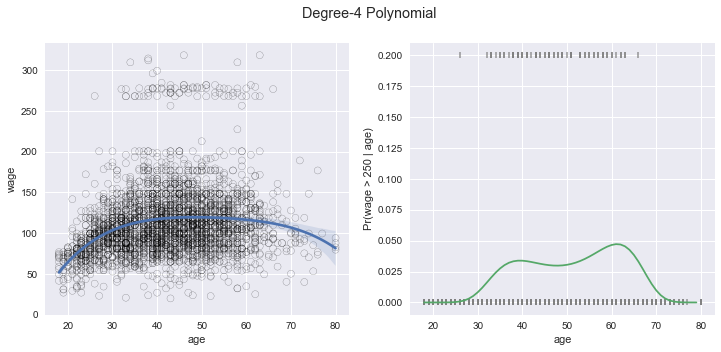

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Degree-4 Polynomial')

# Scatter Plot with Polynomial Regression Line
axes[0].scatter(wage['age'], wage['wage'], facecolor='None', edgecolor='k', alpha=0.5)
sns.regplot(wage['age'], wage['wage'], order=4, truncate=True, scatter=False, ax=axes[0])
axes[0].set_ylim(ymin=0)

# Logistic Regression showing Pr(wage > 250) for the age range
axes[1].plot(age_grid, pred)

# Rug plot showing the distribution of wage > 250 in the training data
axes[1].scatter(wage['age'], wage['wage_250']/5, s=30, c='grey', marker='|', alpha=0.7)

axes[1].set_ylim(-0.01, 0.21)
axes[1].set_xlabel('age')
axes[1].set_ylabel('Pr(wage > 250 | age)')
plt.show()

### Step Function

In [17]:
# We'll cut age into 4 buckets

# The intercept coefficient can be interpreted as the average salary for those under 33.5 years of age
# and the other coefficients can be interpreted as the average additional salary for those other age groups
results = smf.ols('wage ~ pd.cut(age, 4)', data=wage).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.58
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.13e-41
Time:                        13:53:54   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 94.1584      1.476     63.790      0.000      91.264      97.053
pd.cut(age, 4)[T.Interval(33.5, 49.0, closed='right')]    24.0535      1.829     13.148      0.000      20.466      27.641
pd.cut(age, 4)[T.Interval(49.0, 64.5, closed='right')]    23.6646      2.068     11.443      0.000      19.610      27.719
pd.cut(age, 4)[T.Interval(64.5, 80.0, closed='right')]     7.6406      4.987      1.532      0.126      -2.139      17.420
==============================================================================
Omnibus:                     1062.354   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.200
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Splines

In [21]:
# this doesn't work atm due to a scipy bug :'(
import scipy.interpolate as si

y = wage['wage'].values
x = X['age'].values
order = np.argsort(x)
x_sort = x[order]
y_sort = y[order]
t = np.array([25, 40, 60]) # We have pre-specified knots at 25, 40, and 60

# cubic spline
spl = si.LSQUnivariateSpline(x_sort, y_sort, t)
spl(x_sort)

plt.plot(x_sort, y_sort, 'o', ms=5)
plt.plot(x_sort, spl(x_sort), lw=3)

ValueError: x must be strictly increasing

In [ ]:
# For smoothing splines, GAMs and Local Regression, R is probably a better choice

# Exercises: Conceptual
## Questions

1. Consider two curves, $\hat{g}_1$ and $\hat{g}_2$ defined by:
   $$ \hat{g}_1 = arg \underset{g}{min} \bigg(\sum_{i=1}^n (y_i - g(x_i))^2 + \lambda\int \big[g^{(3)}(x)\bigg]^2 dx \bigg)$$
   $$ \hat{g}_1 = arg \underset{g}{min} \bigg(\sum_{i=1}^n (y_i - g(x_i))^2 + \lambda\int \big[g^{(4)}(x)\bigg]^2 dx \bigg)$$
   
   where $g^{(m)}$ represents the mth derivative of g and $g^{(0)} = g$. 
   1. As $\lambda \rightarrow \infty$, will $\hat{g}_1$ or $\hat{g}_2$ have the smaller training RSS?
   2. As $\lambda \rightarrow \infty$, will $\hat{g}_1$ or $\hat{g}_2$ have the smaller test RSS?
   3. For $\lambda = 0$, will $\hat{g}_1$ or $\hat{g}_2$ have the smaller training and test RSS?
   

## Answers
1. 
  1. $\hat{g}_2$ will have the smaller training RSS, because it will be a higher order polynomial due to the order of the penalty function
  2. $\hat{g}_1$ could have the smaller test RSS if $\hat{g}_2$ overfits the data. 
  3. For $\lambda=0$, $\hat{g}_1 = \hat{g}_2$

# Exercises: Applied

## Wage Data Set

1. 
  1. Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree d for the polynomial. What degree was chosen and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data. 
  2. Fit a step function to predict `wage` using `age` and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained. 
  3. The `wage` data set contains a number of other features not explored in this chapter, such as marital status `martl` and job class `jobclass`. Explore the relationships between some of these other predictors and `wage` and use non-linear fitting techniques to fit flexible models to the data. Create plots of the results obtained a write a summary of your findings

In [36]:
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,wage_250
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,0
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,0
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,0
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,0
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = wage[['age']]
y = wage['wage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
errors = []

for d in range(1, 10):
    poly = PolynomialFeatures(degree=d, include_bias=False)
    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)
    errors.append(mean_squared_error(y_test, model.predict(poly.fit_transform(X_test))))

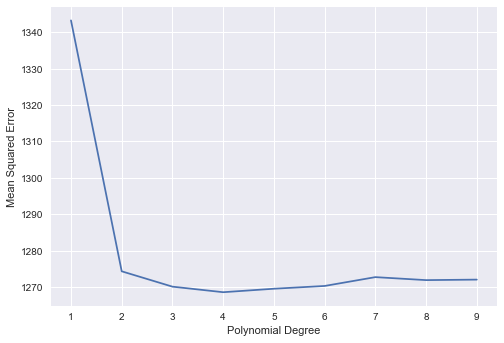

In [45]:
plt.plot(range(1,10), errors)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.show()

In [44]:
# Degree that minimizes the test error
range(1,10)[np.argmin(errors)]

4

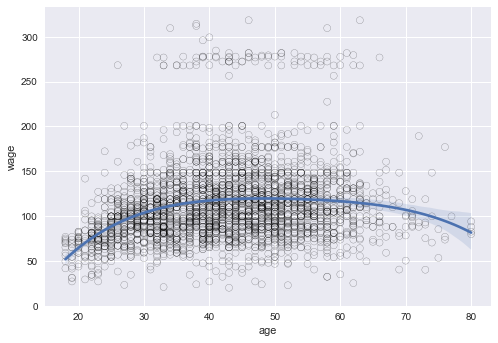

In [56]:
# Scatter Plot with Polynomial Regression Line
fig, axes = plt.subplots(1, 1)
axes.scatter(wage['age'], wage['wage'], facecolor='None', edgecolor='k', alpha=0.5)
sns.regplot(wage['age'], wage['wage'], order=4, truncate=True, scatter=False, ax=axes)
axes.set_ylim(ymin=0)
plt.show()

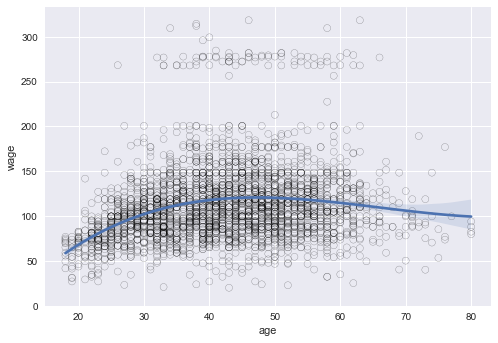

In [57]:
# But from ANOVA, which we did in the lab, it shows that the 4th polynomial term is insignificant
# so 3 may be a better choice

fig, axes = plt.subplots(1, 1)
axes.scatter(wage['age'], wage['wage'], facecolor='None', edgecolor='k', alpha=0.5)
sns.regplot(wage['age'], wage['wage'], order=3, truncate=True, scatter=False, ax=axes)
axes.set_ylim(ymin=0)
plt.show()

In [65]:
from sklearn.model_selection import cross_val_score

# Step Function

cuts = range(1, 51)

X = wage[['age']]
y = wage['wage']
errors = []

for cut in cuts:
    X_new = pd.get_dummies(pd.cut(X['age'], cut)).values
    model = LinearRegression(fit_intercept=False)
    # 10-fold CV with stratified Kfold
    scores = cross_val_score(model, X_new, y, cv=10, scoring='neg_mean_squared_error')
    errors.append(-np.mean(scores))

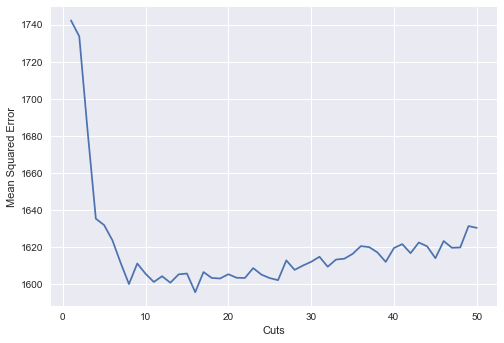

In [67]:
plt.plot(cuts, errors)
plt.xlabel('Cuts')
plt.ylabel('Mean Squared Error')
plt.show()

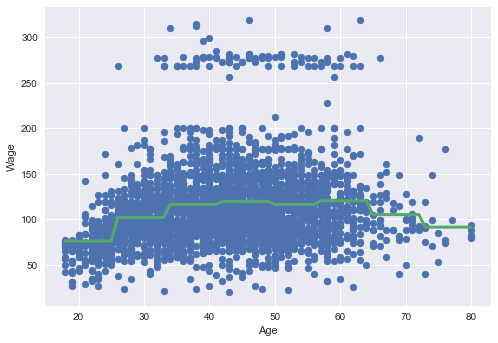

In [80]:
# It looks like the error stops getting significant better after 8 cuts
X_new = pd.get_dummies(pd.cut(X['age'], 8)).values
model = LinearRegression(fit_intercept=False)
model.fit(X_new, y)
order = np.argsort(X['age'])
plt.scatter(X, y)
plt.plot(X['age'].values[order], model.predict(X_new[order]), lw=3, c=sns.color_palette()[1])
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

In [83]:
# Let's just start with the categorical data non transformed
# all of the coefficients seem significant
X = pd.get_dummies(wage[['maritl', 'jobclass']], drop_first=False)
y = wage['wage']

results_orig = smf.OLS(y, X).fit()
results_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     72.98
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           2.67e-72
Time:                        16:53:23   Log-Likelihood:                -15277.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2994   BIC:                         3.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
maritl_1. Never Married    19.5438      2.045      9.557      0.000      15.534      23.553
maritl_2. Married          44.8996      1.733     25.911      0.000      41.502      48.297
maritl_3. Widowed          27.6804      7.806      3.546      0.000      12.374      42.987
maritl_4. Divorced         29.2079      2.813     10.385      0.000      23.693      34.723
maritl_5. Separated        26.7328      4.761      5.616      0.000      17.399      36.067
jobclass_1. Industrial     65.7707      1.714     38.368      0.000      62.410      69.132
jobclass_2. Information    82.2939      1.742     47.228      0.000      78.877      85.710
==============================================================================
Omnibus:                     1049.154   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.093
Skew:                           1.652   Prob(JB):                         0.00
Kurtosis:                       8.049   Cond. No.                     1.08e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.82e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
# How about if we use interaction terms with marital status and job class
X = pd.get_dummies(wage['maritl'] + ' ' + wage['jobclass'])
y = wage['wage']
X.head()

,1. Never Married 1. Industrial,1. Never Married 2. Information,2. Married 1. Industrial,2. Married 2. Information,3. Widowed 1. Industrial,3. Widowed 2. Information,4. Divorced 1. Industrial,4. Divorced 2. Information,5. Separated 1. Industrial,5. Separated 2. Information
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [86]:
# The R^2 value is slightly higher
results = smf.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     40.91
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           1.97e-69
Time:                        17:03:22   Log-Likelihood:                -15276.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2990   BIC:                         3.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
1. Never Married 1. Industrial     84.6314      2.087     40.551      0.000      80.539      88.724
1. Never Married 2. Information   102.6758      2.312     44.417      0.000      98.143     107.208
2. Married 1. Industrial          110.5215      1.219     90.645      0.000     108.131     112.912
2. Married 2. Information         127.3450      1.230    103.541      0.000     124.933     129.757
3. Widowed 1. Industrial          100.9559     11.384      8.869      0.000      78.636     123.276
3. Widowed 2. Information          97.1091     14.905      6.515      0.000      67.885     126.333
4. Divorced 1. Industrial          96.1082      3.886     24.735      0.000      88.490     103.727
4. Divorced 2. Information        110.3500      3.924     28.123      0.000     102.656     118.044
5. Separated 1. Industrial         99.9341      7.734     12.922      0.000      84.770     115.098
5. Separated 2. Information       102.3649      7.323     13.979      0.000      88.007     116.723
==============================================================================
Omnibus:                     1050.722   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4572.814
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                       8.064   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# lets also add age back in

X['age'] = wage['age']
X.head()

,1. Never Married 1. Industrial,1. Never Married 2. Information,2. Married 1. Industrial,2. Married 2. Information,3. Widowed 1. Industrial,3. Widowed 2. Information,4. Divorced 1. Industrial,4. Divorced 2. Information,5. Separated 1. Industrial,5. Separated 2. Information,age
0,1,0,0,0,0,0,0,0,0,0,18
1,0,1,0,0,0,0,0,0,0,0,24
2,0,0,1,0,0,0,0,0,0,0,45
3,0,0,0,1,0,0,0,0,0,0,43
4,0,0,0,0,0,0,0,1,0,0,50


In [88]:
results = smf.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     39.87
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           2.22e-74
Time:                        17:04:47   Log-Likelihood:                -15262.
No. Observations:                3000   AIC:                         3.055e+04
Df Residuals:                    2989   BIC:                         3.061e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
1. Never Married 1. Industrial     73.2985      3.006     24.388      0.000      67.405      79.192
1. Never Married 2. Information    90.0683      3.337     26.994      0.000      83.526      96.611
2. Married 1. Industrial           94.3446      3.329     28.341      0.000      87.817     100.872
2. Married 2. Information         110.7352      3.410     32.473      0.000     104.049     117.421
3. Widowed 1. Industrial           82.3520     11.881      6.931      0.000      59.056     105.648
3. Widowed 2. Information          78.6313     15.256      5.154      0.000      48.718     108.545
4. Divorced 1. Industrial          79.1908      5.047     15.690      0.000      69.295      89.087
4. Divorced 2. Information         92.4681      5.196     17.795      0.000      82.279     102.657
5. Separated 1. Industrial         83.7028      8.304     10.080      0.000      67.420      99.985
5. Separated 2. Information        86.5528      7.895     10.963      0.000      71.072     102.033
age                                 0.3654      0.070      5.219      0.000       0.228       0.503
==============================================================================
Omnibus:                     1045.769   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4573.481
Skew:                           1.643   Prob(JB):                         0.00
Kurtosis:                       8.079   Cond. No.                         955.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Let's add more polynomial terms of age

X['age2'] = np.power(wage['age'], 2)
X['age3'] = np.power(wage['age'], 3)
results = smf.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     41.55
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           2.78e-91
Time:                        17:05:31   Log-Likelihood:                -15218.
No. Observations:                3000   AIC:                         3.046e+04
Df Residuals:                    2987   BIC:                         3.054e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
1. Never Married 1. Industrial    -35.6934     22.192     -1.608      0.108     -79.206       7.819
1. Never Married 2. Information   -21.8306     22.556     -0.968      0.333     -66.057      22.395
2. Married 1. Industrial          -22.4132     22.904     -0.979      0.328     -67.322      22.496
2. Married 2. Information          -6.0780     22.918     -0.265      0.791     -51.014      38.858
3. Widowed 1. Industrial          -32.4870     25.444     -1.277      0.202     -82.377      17.403
3. Widowed 2. Information         -31.8771     27.306     -1.167      0.243     -85.417      21.663
4. Divorced 1. Industrial         -37.8676     23.182     -1.634      0.102     -83.321       7.586
4. Divorced 2. Information        -23.9678     23.208     -1.033      0.302     -69.473      21.537
5. Separated 1. Industrial        -31.5427     23.807     -1.325      0.185     -78.223      15.138
5. Separated 2. Information       -31.9772     24.092     -1.327      0.185     -79.216      15.262
age                                 6.9518      1.613      4.311      0.000       3.790      10.114
age2                               -0.1085      0.037     -2.969      0.003      -0.180      -0.037
age3                                0.0005      0.000      1.838      0.066   -3.28e-05       0.001
==============================================================================
Omnibus:                     1066.158   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4848.292
Skew:                           1.663   Prob(JB):                         0.00
Kurtosis:                       8.265   Cond. No.                     1.21e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,wage_250
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,0
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,0
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,0
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,0
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,0


In [92]:
# Let's try education & sex & age

X = pd.get_dummies(wage[['sex', 'education']], drop_first=False)
X['age'] = wage['age']
X.head()

,sex_1. Male,education_1. < HS Grad,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,age
0,1,1,0,0,0,0,18
1,1,0,0,0,1,0,24
2,1,0,0,1,0,0,45
3,1,0,0,0,1,0,43
4,1,0,1,0,0,0,50


In [93]:
# This has been the best model so far
results = smf.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     209.6
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          4.12e-192
Time:                        17:10:04   Log-Likelihood:                -15000.
No. Observations:                3000   AIC:                         3.001e+04
Df Residuals:                    2994   BIC:                         3.005e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
sex_1. Male                     73.6731      2.115     34.835      0.000      69.526      77.820
education_1. < HS Grad         -13.3372      1.926     -6.926      0.000     -17.113      -9.561
education_2. HS Grad            -1.8985      1.183     -1.605      0.109      -4.218       0.421
education_3. Some College       10.8298      1.336      8.107      0.000       8.210      13.449
education_4. College Grad       26.4296      1.340     19.723      0.000      23.802      29.057
education_5. Advanced Degree    51.6494      1.638     31.530      0.000      48.437      54.861
age                              0.5687      0.057      9.943      0.000       0.457       0.681
==============================================================================
Omnibus:                      989.006   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5014.497
Skew:                           1.489   Prob(JB):                         0.00
Kurtosis:                       8.589   Cond. No.                     1.42e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.87e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [95]:
# and a little better with the polynomial terms
X['age2'] = np.power(wage['age'], 2)
X['age3'] = np.power(wage['age'], 3)
results = smf.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     172.6
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          4.68e-215
Time:                        17:11:58   Log-Likelihood:                -14941.
No. Observations:                3000   AIC:                         2.990e+04
Df Residuals:                    2992   BIC:                         2.995e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
sex_1. Male                    -19.6725     16.397     -1.200      0.230     -51.824      12.479
education_1. < HS Grad         -30.8589      3.718     -8.301      0.000     -38.148     -23.570
education_2. HS Grad           -19.9982      3.400     -5.882      0.000     -26.664     -13.332
education_3. Some College       -7.6405      3.492     -2.188      0.029     -14.487      -0.794
education_4. College Grad        7.0710      3.546      1.994      0.046       0.118      14.024
education_5. Advanced Degree    31.7541      3.707      8.565      0.000      24.485      39.023
age                              7.1351      1.421      5.020      0.000       4.348       9.922
age2                            -0.1107      0.033     -3.394      0.001      -0.175      -0.047
age3                             0.0005      0.000      2.120      0.034     3.8e-05       0.001
==============================================================================
Omnibus:                     1032.239   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5511.689
Skew:                           1.544   Prob(JB):                         0.00
Kurtosis:                       8.878   Cond. No.                     7.56e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.33e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""